In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Funciones import *
# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Football.csv")

df

In [ ]:
# Definir las ligas que forman parte del top 5 europeo
ligas_top5 = [
    "Premier-league",
    "Bundesliga",
    "Serie-a",
    "Ligue-1",
    "Laliga"
]

# Crear nuevo DataFrame con solo esas ligas
df_top5 = df[df["League"].isin(ligas_top5)].copy()


In [ ]:
df_top5.to_csv("top5_ligas.csv", index=False)

In [ ]:
df_top5["League"].unique()

In [ ]:
df_top5

In [ ]:
df_top5.info()

In [ ]:
df_top5.describe()

In [ ]:
df_top5.columns = df_top5.columns.str.replace("host", "away")
df_top5.columns = df_top5.columns.str.replace("Host", "Away")

In [ ]:
# Lista de columnas que quiero borrar
columnas_a_borrar = [
    "referee", "venue", "attendance", "capacity", "Blocked_Shots_Away", "Blocked_Shots_Home", "away_team_yellow_card_current_time",
    "Free_Kicks_Home", "Shots_off_Goal_Away","away_team_red_card_current_time","away_team_red_card", "home_team_red_card", "Distance_Covered_(km)_Away",
    "Free_Kicks_Away", "Shots_off_Goal_Home","home_team_yellow_card_current_time", "Clearances_Completed_Home", "Clearances_Completed_Away", "Interceptions_Home",
    "Crosses_Completed_Home", "Crosses_Completed_Away", "Free_Kicks_Away","away_team_substitution_why","home_team_red_card_current_time", "Interceptions_Away",
    "Throw_ins_Away", "Throw_ins_Home", "Corner_Kicks_Away", "home_team_substitution_why", "Distance_Covered_(km)_Home",
    "home_team_goals_current_score", "away_team_goals_current_score", "Date_hour", "Date_day", "Tackles_Away", "Tackles_Home", "Pass_Success_per_Away", "Pass_Success_per_Away",
    "Corner_Kicks_Home", "Pass_Success_per_Home", "Dangerous_Attacks_Home", "Dangerous_Attacks_Away", "Attacks_Home", "Attacks_Away", 
    "Completed_Passes_Home", "Completed_Passes_Away", "home_team_yellow_card", "away_team_yellow_card", "Goal_Attempts_Home", "Goal_Attempts_Away"
]

# Borrarlas del Dataset
df_top5= df_top5.drop(columns=columnas_a_borrar)

In [ ]:
df_top5

In [ ]:
columnas_rellenables = [
    "Red_Cards_Home", "Red_Cards_Away",
    "Yellow_Cards_Home", "Yellow_Cards_Away",
    "Fouls_Home", "Fouls_Away",
    "Offsides_Home", "Offsides_Away"
]

df_top5[columnas_rellenables] = df_top5[columnas_rellenables].fillna(0)

df_top5[columnas_rellenables].isnull().sum()

In [ ]:
# Crear la columna resultado, dependiendo de quien haya ganado el partido.

df_top5["resultado"] = df_top5.apply(lambda row: "local" if row["home_score"] > row["away_score"] 
                           else "visitante" if row["home_score"] < row["away_score"] 
                           else "empate", axis=1)
df_top5

In [ ]:
# Asegurar que las columnas de goles estén en formato entero

df_top5["home_score"] = pd.to_numeric(df_top5["home_score"]).astype(int)

df_top5["away_score"] = pd.to_numeric(df_top5["away_score"]).astype(int)

In [ ]:
# Eliminar % y convertir a float
df_top5["Ball_Possession_Home"] = df_top5["Ball_Possession_Home"].astype(str).str.replace("%", "").astype(float)
df_top5["Ball_Possession_Away"] = df_top5["Ball_Possession_Away"].astype(str).str.replace("%", "").astype(float)

In [ ]:
df_top5["Yellow_Cards_Home"] = pd.to_numeric(df_top5["Yellow_Cards_Home"], errors="coerce")
df_top5["Yellow_Cards_Away"] = pd.to_numeric(df_top5["Yellow_Cards_Host"], errors="coerce")

df_top5["home_score"] = pd.to_numeric(df_top5["home_score"], errors="coerce")
df_top5["away_score"] = pd.to_numeric(df_top5["away_score"], errors="coerce")

In [ ]:
# Asegurarte de que los datos estén en formato numérico
df_top5["Shots_on_Goal_Home"] = pd.to_numeric(df_top5["Shots_on_Goal_Home"], errors="coerce")
df_top5["Shots_on_Goal_Away"] = pd.to_numeric(df_top5["Shots_on_Goal_Away"], errors="coerce")

In [ ]:
# Eliminar filas donde home_score o away_score sean el string "-"

# Crear máscara booleana para esas filas
condicion = (df_top5["home_score"] == "-") & (df_top5["away_score"] == "-")

# Usar drop con los índices que cumplen la condición
df_top5 = df_top5.drop(index=df_top5[condicion].index)

In [ ]:
# Diferencia de goles
df_top5["diferencia_goles"] = df_top5["home_score"] - df_top5["away_score"]

# Cambiamos la columna por su valor absoluto para tener la diferencia siempre en positivo
df_top5["diferencia_goles"] = df_top5["diferencia_goles"].abs()

df_top5

In [ ]:
# Crear columna: quién tuvo más posesión, o NaN si falta alguno

df_top5["Mayor_Posesion"] = df_top5.apply(
    lambda row: (
        "local" if row["Ball_Possession_Home"] > row["Ball_Possession_Away"]
        else "visitante" if row["Ball_Possession_Home"] < row["Ball_Possession_Away"]
        else "empate" if pd.notnull(row["Ball_Possession_Home"]) and pd.notnull(row["Ball_Possession_Away"])
        else np.nan
    ),
    axis=1
)


In [ ]:
# ¿Quién recibió más tarjetas?

df_top5["equipo_mas_amarillas"] = df_top5.apply(
    lambda row: "local" if row["Yellow_Cards_Home"] > row["Yellow_Cards_Away"]
    else "visitante" if row["Yellow_Cards_Home"] < row["Yellow_Cards_Away"]
    else "igual", axis=1
)

In [ ]:
# Crear columna portero_mas_exigido

df_top5["portero_mas_paradas"] = df_top5.apply(
    lambda row: "local" if row["Goalkeeper_Saves_Home"] > row["Goalkeeper_Saves_Away"]
    else "visitante" if row["Goalkeeper_Saves_Home"] < row["Goalkeeper_Saves_Away"]
    else "igual", axis=1
)

In [ ]:
# Crear columna que indica quién recibió más tiros a puerta

df_top5["equipo_recibe_mas_tiros"] = df_top5.apply(
    lambda row: "local" if row["Shots_on_Goal_Away"] > row["Shots_on_Goal_Home"]
    else "visitante" if row["Shots_on_Goal_Home"] > row["Shots_on_Goal_Away"]
    else "igual",
    axis=1
)


In [ ]:
df_top5


In [ ]:
df_top5 = imputar_offsides(df_top5, "home_team", "Offsides_Home")

In [ ]:
df_top5 = imputar_offsides(df_top5, "away_team", "Offsides_Away")

In [ ]:
df_top5

In [ ]:
'''
HIPOTESIS 1 - ¿TENER MAS POSESION AUMENTA LAS POSIBILIDADES DE GANAR?
'''

# Crear tabla de frecuencias absolutas
tabla_abs = pd.crosstab(df_top5["Mayor_Posesion"], df_top5["resultado"]).astype(int)

# Crear tabla de porcentajes fila a fila
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=1), axis=0) * 100  # convierte a porcentajes

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 6))
colors = ["#4C72B0", "#55A868", "#C44E52"]

bars = tabla_abs.plot(
    kind="bar",
    stacked=True,
    color=colors,
    edgecolor="black",
    ax=ax
)

# Estética del gráfico
plt.title("¿Quién gana según quién tiene más posesión?", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Equipo con más posesión", fontsize=13)
plt.ylabel("Número de partidos", fontsize=13)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.6)
plt.legend(
    title="Resultado del partido",
    title_fontsize=12,
    fontsize=11,
    loc="upper right",
    frameon=True,
    edgecolor="black"
)

# Añadir etiquetas con porcentaje centrado dentro de las barras
for idx, container in enumerate(bars.containers):
    for i, bar in enumerate(container):
        valor_pct = tabla_pct.iloc[i, idx]
        if valor_pct > 0:
            bars.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f"{valor_pct:.1f}%",
                ha='center',
                va='center',
                fontsize=9,
                color='white',
                fontweight='bold'
            )

plt.tight_layout()
plt.show()


In [ ]:
# Crear columna con el total de goles por partido

df_top5["total_goles"] = df_top5["home_score"] + df_top5["away_score"]

df_top5

In [ ]:
# Agrupar por temporada y calcular media de goles por partido
goles_por_anio = df_top5.groupby("season_year")["total_goles"].mean().reset_index()

# Crear gráfico de línea
plt.figure(figsize=(10, 6))
sns.lineplot(data=goles_por_anio, x="season_year", y="total_goles", marker="o", linewidth=2.5)

# Estética del gráfico
plt.title("Evolución del promedio de goles por partido", fontsize=14, fontweight="bold")
plt.xlabel("Temporada", fontsize=12)
plt.ylabel("Goles por partido", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# Agrupar por temporada y liga para calcular el promedio de goles

goles_por_liga_temp = df_top5.groupby(["season_year", "League"])["total_goles"].mean().reset_index()

# Crear gráfico

plt.figure(figsize=(12, 7))
sns.lineplot(
    data=goles_por_liga_temp,
    x="season_year",
    y="total_goles",
    hue="League",
    marker="o",
    linewidth=2.2
)

# Estética del gráfico

plt.title("Promedio de goles por temporada en las 5 grandes ligas", fontsize=16, fontweight="bold")
plt.xlabel("Temporada", fontsize=12)
plt.ylabel("Goles por partido", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Liga", title_fontsize=12, fontsize=10, loc="upper left", frameon=True)
plt.tight_layout()
plt.show()



In [ ]:
# ¿Ganó el que recibió más tarjetas?
df_top5["gana_quien_mas_amarillas"] = df_top5["resultado"] == df_top5["equipo_mas_amarillas"]

# Porcentaje de cada caso
conteo = df_top5["gana_quien_mas_amarillas"].value_counts(normalize=True) * 100
conteo = conteo.rename({True: "Sí", False: "No"}).reset_index()
conteo.columns = ["¿Ganó el que tuvo más amarillas?", "Porcentaje"]

# Gráfico
plt.figure(figsize=(6, 4))
barplot = sns.barplot(data=conteo, x="¿Ganó el que tuvo más amarillas?", y="Porcentaje", palette="pastel")
plt.title("¿Gana el equipo que recibe más tarjetas amarillas?", fontsize=13, fontweight="bold")
plt.ylim(0, 100)
plt.ylabel("Porcentaje de partidos")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Añadir etiquetas con porcentaje
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f"{height:.1f}%", (p.get_x() + p.get_width() / 2, height / 2),
                     ha='center', va='center', fontsize=11, color='black', fontweight="bold")

plt.tight_layout()
plt.show()


In [ ]:
# Agrupar por: quién recibió más tiros y quién ganó el partido

tabla_agrupada = df_top5.groupby(["equipo_recibe_mas_tiros", "resultado"]).size().reset_index(name="Partidos")

# Crear gráfico de barras agrupadas
plt.figure(figsize=(9, 6))
sns.barplot(data=tabla_agrupada, x="equipo_recibe_mas_tiros", y="Partidos", hue="resultado", palette="Set2")

# Estética
plt.title("Resultado del partido según quién recibió más disparos a puerta", fontsize=14, fontweight="bold")
plt.xlabel("Equipo que recibió más tiros a puerta", fontsize=12)
plt.ylabel("Número de partidos", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Resultado del partido", title_fontsize=11, fontsize=10, loc="upper right")
plt.tight_layout()
plt.show()


IndexError: single positional indexer is out-of-bounds

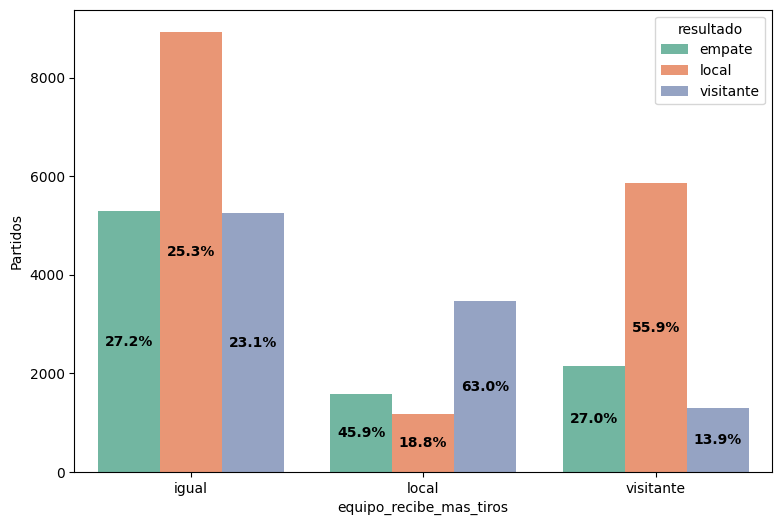

In [143]:
# Agrupar por quién recibió más tiros y resultado del partido
tabla_agrupada = df_top5.groupby(["equipo_recibe_mas_tiros", "resultado"]).size().reset_index(name="Partidos")

# Calcular el porcentaje de cada resultado dentro de cada grupo de 'equipo_recibe_mas_tiros'
tabla_agrupada["Porcentaje"] = tabla_agrupada.groupby("equipo_recibe_mas_tiros")["Partidos"].transform(
    lambda x: (x / x.sum()) * 100
)

# Crear gráfico de barras agrupadas
plt.figure(figsize=(9, 6))
barplot = sns.barplot(
    data=tabla_agrupada,
    x="equipo_recibe_mas_tiros",
    y="Partidos",
    hue="resultado",
    palette="Set2"
)

# Añadir porcentajes dentro de las barras
for i, bar in enumerate(barplot.patches):
    height = bar.get_height()
    porcentaje = tabla_agrupada["Porcentaje"].iloc[i]
    barplot.annotate(f"{porcentaje:.1f}%", (bar.get_x() + bar.get_width() / 2, height / 2),
                     ha="center", va="center", fontsize=10, color="black", fontweight="bold")

# Estética del gráfico
plt.title("Resultado del partido según quién recibió más disparos a puerta", fontsize=14, fontweight="bold")
plt.xlabel("Equipo que recibió más tiros a puerta", fontsize=12)
plt.ylabel("Número de partidos", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Resultado del partido", title_fontsize=11, fontsize=10, loc="upper right")
plt.tight_layout()
plt.show()


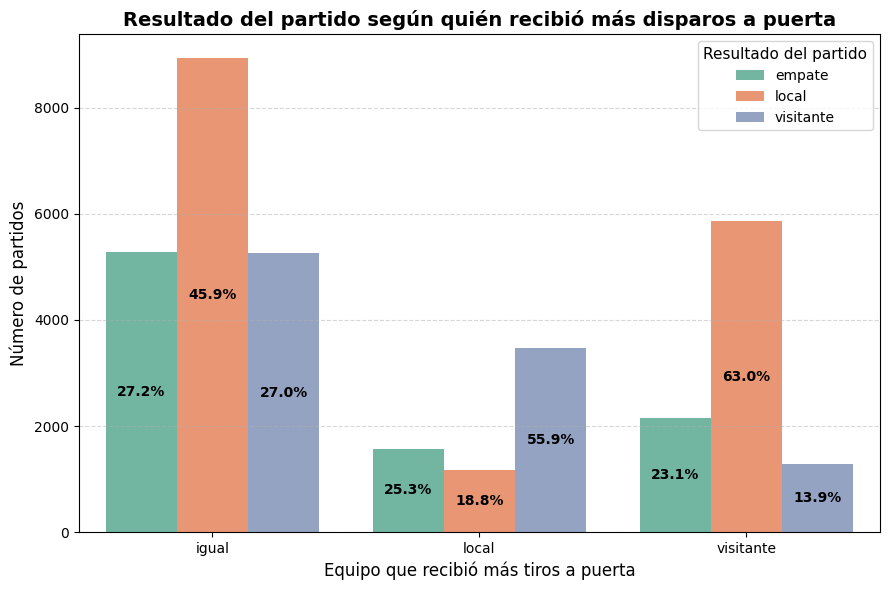

In [142]:
# Crear tabla de frecuencias
tabla_abs = pd.crosstab(df_top5["equipo_recibe_mas_tiros"], df_top5["resultado"])

# Calcular porcentajes por fila
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=1), axis=0) * 100

# Transformar para graficar con seaborn (de wide a long format)
tabla_reset = tabla_abs.reset_index().melt(id_vars="equipo_recibe_mas_tiros", var_name="resultado", value_name="Partidos")
tabla_reset["Porcentaje"] = tabla_reset.apply(
    lambda row: tabla_pct.loc[row["equipo_recibe_mas_tiros"], row["resultado"]], axis=1
)

# Crear gráfico
plt.figure(figsize=(9, 6))
barplot = sns.barplot(
    data=tabla_reset,
    x="equipo_recibe_mas_tiros",
    y="Partidos",
    hue="resultado",
    palette="Set2"
)

# Añadir etiquetas de porcentaje con valores bien alineados
for i, row in tabla_reset.iterrows():
    grupo = row["equipo_recibe_mas_tiros"]
    resultado = row["resultado"]
    porcentaje = row["Porcentaje"]
    total = row["Partidos"]
    if total > 0:
        bar = barplot.patches[i]
        height = bar.get_height()
        barplot.annotate(f"{porcentaje:.1f}%", (bar.get_x() + bar.get_width() / 2, height / 2),
                         ha="center", va="center", fontsize=10, color="black", fontweight="bold")

# Estética
plt.title("Resultado del partido según quién recibió más disparos a puerta", fontsize=14, fontweight="bold")
plt.xlabel("Equipo que recibió más tiros a puerta", fontsize=12)
plt.ylabel("Número de partidos", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Resultado del partido", title_fontsize=11, fontsize=10, loc="upper right")
plt.tight_layout()
plt.show()


portero_y_equipo_recibe_tiros_coinciden
True     88.234958
False    11.765042
Name: proportion, dtype: float64


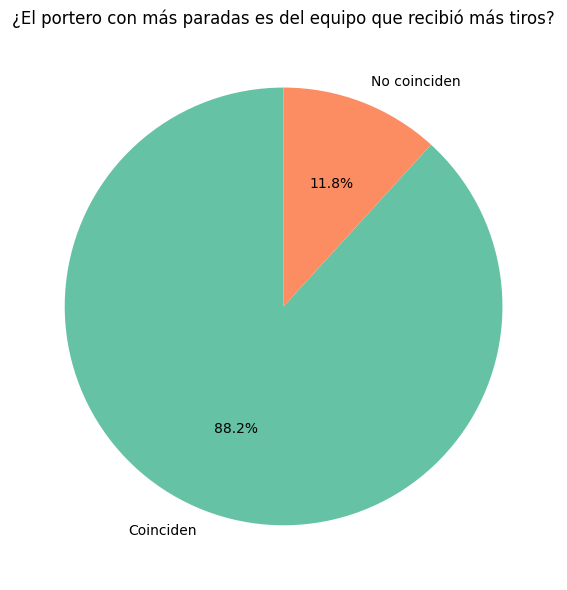

In [144]:
# Crear una nueva columna que indica si el portero con más paradas fue del equipo que recibió más tiros
df_top5["portero_y_equipo_recibe_tiros_coinciden"] = df_top5.apply(
    lambda row: row["portero_mas_paradas"] == row["equipo_recibe_mas_tiros"], axis=1
)

# Ver frecuencia
print(df_top5["portero_y_equipo_recibe_tiros_coinciden"].value_counts(normalize=True) * 100)

# Gráfico de torta para visualizarlo
plt.figure(figsize=(6, 6))
df_top5["portero_y_equipo_recibe_tiros_coinciden"].value_counts().plot.pie(
    autopct='%1.1f%%', labels=["Coinciden", "No coinciden"], startangle=90, colors=["#66c2a5", "#fc8d62"]
)
plt.title("¿El portero con más paradas es del equipo que recibió más tiros?")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [145]:
df_top5

,Country,League,home_team,away_team,home_score,away_score,season_year,first_half,second_half,home_team_goals_current_time,...,resultado,diferencia_goles,Mayor_Posesion,equipo_mas_amarillas,portero_mas_exigido,equipo_recibe_mas_tiros,portero_mas_paradas,total_goles,gana_quien_mas_amarillas,portero_y_equipo_recibe_tiros_coinciden
0,Germany,Bundesliga,B. Monchengladbach,Werder Bremen,4,1,2024/2025,3 - 0,1 - 1,"[""11'"", ""12'"", ""45'"", ""66'""]",...,local,3,visitante,visitante,igual,visitante,igual,5,False,False
1,Germany,Bundesliga,Freiburg,Mainz,0,0,2024/2025,0 - 0,0 - 0,NaN,...,empate,0,local,visitante,igual,igual,igual,0,False,True
2,Germany,Bundesliga,Dortmund,RB Leipzig,2,1,2024/2025,1 - 1,1 - 0,"[""30'"", ""65'""]",...,local,1,local,visitante,visitante,visitante,visitante,3,False,True
3,Germany,Bundesliga,Bayern Munich,Union Berlin,3,0,2024/2025,2 - 0,1 - 0,"[""15'"", ""43'"", ""51'""]",...,local,3,local,visitante,visitante,visitante,visitante,3,False,True
4,Germany,Bundesliga,Eintracht Frankfurt,Bochum,7,2,2024/2025,4 - 1,3 - 1,"[""9'"", ""18'"", ""20'"", ""32'"", ""61'"", ""66'"", ""69'""]",...,local,5,local,visitante,local,visitante,local,9,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85877,Spain,Laliga,Valladolid,Rayo Vallecano,1,3,2000/2001,1 - 1,0 - 2,NaN,...,visitante,2,NaN,igual,igual,igual,igual,4,False,True
85878,Spain,Laliga,Dep. La Coruna,Villarreal,4,2,2000/2001,2 - 0,2 - 2,NaN,...,local,2,NaN,igual,igual,igual,igual,6,False,True
85879,Spain,Laliga,Malaga,Celta Vigo,1,4,2000/2001,1 - 2,0 - 2,NaN,...,visitante,3,NaN,igual,igual,igual,igual,5,False,True
85880,Spain,Laliga,Real Madrid,Numancia,1,0,2000/2001,1 - 0,0 - 0,NaN,...,local,1,NaN,igual,igual,igual,igual,1,False,True
